# DATA MANIPULATION

# Data Aggregation 

pd.groupby
pd.pivot_table
pd.merge
pd.concat

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('World_Happiness_2015.csv')

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


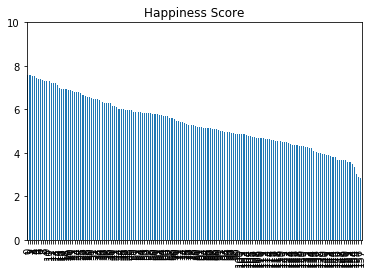

In [5]:
df['Happiness Score'].plot(kind='bar', title='Happiness Score', ylim=(0,10))

In [6]:
# graph above is too busy; lets try graphing a region
df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

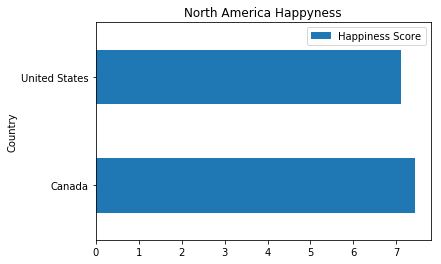

In [7]:
na_reg = df[df['Region'] == 'North America']
na_reg.plot(x='Country', y='Happiness Score', kind='barh', title='North America Happyness')

In [8]:
df[df['Country']=='Mexico']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
13,Mexico,Latin America and Caribbean,14,7.187,0.04176,1.02054,0.91451,0.81444,0.48181,0.21312,0.14074,3.60214


In [9]:
# calculating the mean for each region
# this is a manual way of doing what groupby can do in one line

mean_happiness = {}
regions = df['Region'].unique()
for r in regions:
    # this splits the dataset into groups
    region_group = df[df['Region'] == r]
    # this applies the mean function to each group
    region_mean = region_group['Happiness Rank'].mean()
    # this combines all the results to one data structure
    mean_happiness[r] = region_mean
                      

In [10]:
mean_happiness

{'Western Europe': 29.523809523809526,
 'North America': 10.0,
 'Australia and New Zealand': 9.5,
 'Middle East and Northern Africa': 77.6,
 'Latin America and Caribbean': 46.90909090909091,
 'Southeastern Asia': 81.22222222222223,
 'Central and Eastern Europe': 79.0,
 'Eastern Asia': 64.5,
 'Sub-Saharan Africa': 127.9,
 'Southern Asia': 113.14285714285714}

## GroupBy method; the first thing to do is create a GroupBy object in this format
- df.groupby('col') groups by a column
- GroupBy.get_group() allows us to get data for a particular group
- GroupBy.groups gives us info about each group, (name, dtype, index in original df)
- you can group by multiple columns by passing a list into the method

In [11]:
# getting the value of distinct items for each region
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [12]:
print(df.groupby('Region'))

In [13]:
north_america = df.iloc[[4, 14]]
                 
grouped = df.groupby('Region')
na_group = grouped.get_group('North America')
                 
equal = north_america==na_group

In [14]:
equal

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,True,True,True,True,True,True,True,True,True,True,True,True
14,True,True,True,True,True,True,True,True,True,True,True,True


In [15]:
# size method provides the number of rows for each group
grouped.size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

In [16]:
# groupby can aggregate by more than one function with this syntac
# GroupBy.agg([func_name_1, func_name_2, func_name_3])

grouped = df.groupby('Region')
happy_grouped = grouped['Happiness Score']
def dif(group):
    return (group.max() - group.mean())

happy_mean_max = happy_grouped.agg([np.min, np.mean, np.max])

mean_max_dif = happy_grouped.agg(dif)

In [17]:
print(happy_mean_max)

                                  amin      mean   amax
Region                                                 
Australia and New Zealand        7.284  7.285000  7.286
Central and Eastern Europe       4.218  5.332931  6.505
Eastern Asia                     4.874  5.626167  6.298
Latin America and Caribbean      4.518  6.144682  7.226
Middle East and Northern Africa  3.006  5.406900  7.278
North America                    7.119  7.273000  7.427
Southeastern Asia                3.819  5.317444  6.798
Southern Asia                    3.575  4.580857  5.253
Sub-Saharan Africa               2.839  4.202800  5.477
Western Europe                   4.857  6.689619  7.587


In [18]:
print(mean_max_dif)

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64


In [19]:
# you can chain arguments to one line
happiness_means = df.groupby('Region')['Happiness Score'].mean()

happiness_means

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

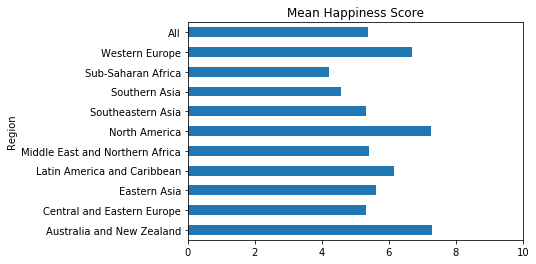

In [20]:
# df pivot_table allows us to aggregate multiple columns and apply multiple functions all at once
pv_happiness = df.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)

pv_happiness.plot(kind='barh', xlim=(0,10), title='Mean Happiness Score', legend=False)

world_mean_happiness = df['Happiness Score'].mean()

In [21]:
pv_happiness

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


In [22]:
world_mean_happiness

5.37573417721519

In [23]:
# with multiple columns; mean is the default agg function
df.pivot_table(['Happiness Score', 'Family'], 'Region')

,Family,Happiness Score
Region,,
Australia and New Zealand,1.314450,7.285000
Central and Eastern Europe,1.053042,5.332931
Eastern Asia,1.099427,5.626167
Latin America and Caribbean,1.104720,6.144682
Middle East and Northern Africa,0.920490,5.406900
North America,1.284860,7.273000
Southeastern Asia,0.940468,5.317444
Southern Asia,0.645321,4.580857
Sub-Saharan Africa,0.809085,4.202800


In [24]:
# pivot_table with multiple agg functions
df.pivot_table('Happiness Score', 'Region', aggfunc=[np.mean, np.min , np.max], margins=True)

,mean,amin,amax
,Happiness Score,Happiness Score,Happiness Score
Region,,,
Australia and New Zealand,7.285000,7.284,7.286
Central and Eastern Europe,5.332931,4.218,6.505
Eastern Asia,5.626167,4.874,6.298
Latin America and Caribbean,6.144682,4.518,7.226
Middle East and Northern Africa,5.406900,3.006,7.278
North America,7.273000,7.119,7.427
Southeastern Asia,5.317444,3.819,6.798
Southern Asia,4.580857,3.575,5.253


In [25]:
# aggregating multiple columuns with multiple stats using group by
grouped = df.groupby('Region')[['Happiness Score', 'Family']]
happy_family_stats = grouped.agg([np.min,np.max,np.mean])
happy_family_stats

Happiness Score                    Family  \
                                           amin   amax      mean     amin   
Region                                                                      
Australia and New Zealand                 7.284  7.286  7.285000  1.30923   
Central and Eastern Europe                4.218  6.505  5.332931  0.38562   
Eastern Asia                              4.874  6.298  5.626167  0.94675   
Latin America and Caribbean               4.518  7.226  6.144682  0.74302   
Middle East and Northern Africa           3.006  7.278  5.406900  0.47489   
North America                             7.119  7.427  7.273000  1.24711   
Southeastern Asia                         3.819  6.798  5.317444  0.62736   
Southern Asia                             3.575  5.253  4.580857  0.30285   
Sub-Saharan Africa                        2.839  5.477  4.202800  0.00000   
Western Europe                            4.857  7.587  6.689619  0.89318   

                                                    
                                    amax      mean  
Region                                              
Australia and New Zealand        1.31967  1.314450  
Central and Eastern Europe       1.34043  1.053042  
Eastern Asia                     1.30060  1.099427  
Latin America and Caribbean      1.30477  1.104720  
Middle East and Northern Africa  1.22393  0.920490  
North America                    1.32261  1.284860  
Southeastern Asia                1.26504  0.940468  
Southern Asia                    1.10395  0.645321  
Sub-Saharan Africa               1.18468  0.809085  
Western Europe                   1.40223  1.247302

In [26]:
# same as above but using pivot_table
pv_happy_family_stats = df.pivot_table(['Happiness Score', 'Family'], 'Region', aggfunc=[np.min, np.max, np.mean], margins=True)
pv_happy_family_stats

amin                     amax  \
                                  Family Happiness Score   Family   
Region                                                              
Australia and New Zealand        1.30923           7.284  1.31967   
Central and Eastern Europe       0.38562           4.218  1.34043   
Eastern Asia                     0.94675           4.874  1.30060   
Latin America and Caribbean      0.74302           4.518  1.30477   
Middle East and Northern Africa  0.47489           3.006  1.22393   
North America                    1.24711           7.119  1.32261   
Southeastern Asia                0.62736           3.819  1.26504   
Southern Asia                    0.30285           3.575  1.10395   
Sub-Saharan Africa               0.00000           2.839  1.18468   
Western Europe                   0.89318           4.857  1.40223   
All                              0.00000           2.839  1.40223   

                                                     mean                  
                                Happiness Score    Family Happiness Score  
Region                                                                     
Australia and New Zealand                 7.286  1.314450        7.285000  
Central and Eastern Europe                6.505  1.053042        5.332931  
Eastern Asia                              6.298  1.099427        5.626167  
Latin America and Caribbean               7.226  1.104720        6.144682  
Middle East and Northern Africa           7.278  0.920490        5.406900  
North America                             7.427  1.284860        7.273000  
Southeastern Asia                         6.798  0.940468        5.317444  
Southern Asia                             5.253  0.645321        4.580857  
Sub-Saharan Africa                        5.477  0.809085        4.202800  
Western Europe                            7.587  1.247302        6.689619  
All                                       7.587  0.991046        5.375734

# Combining and Merging Data

In [27]:
df_2015 = pd.read_csv('World_Happiness_2015.csv')
df_2016 = pd.read_csv('World_Happiness_2016.csv')
df_2017 = pd.read_csv('World_Happiness_2017.csv')

In [28]:
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017

In [29]:
df_2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

In [30]:
df_2017.head()

,Country,Happiness.Rank,Happiness Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [31]:
df_2015.shape[0]

158

In [32]:
# merging dataframes

four_2015 = df_2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = df_2016[['Country','Happiness Rank','Year']].iloc[2:5]

merge_index = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, 
                       suffixes = ('_2015','_2016'))
rows = merge_index.shape[0]
columns = merge_index.shape[1]

merge_index_left = pd.merge(four_2015, three_2016, left_index=True, right_index=True, how='left', 
                            suffixes=('_2015','_2016'))
rows = merge_index_left.shape[0]
columns = merge_index_left.shape[1]

In [33]:
merge_index

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3,2016
3,Norway,4,2015,Norway,4,2016
4,Canada,5,2015,Finland,5,2016


In [34]:
merge_index_left

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3.0,2016.0
3,Norway,4,2015,Norway,4.0,2016.0
4,Canada,5,2015,Finland,5.0,2016.0
5,Finland,6,2015,NaN,NaN,NaN


pd.concat
- default join = Outer
- can combine more than one dataframe at a time
- can combine vertically (axis = 0, default), horizantally (axis = 1, needs to be set)
- sintax:

Concat (Vertically)

concat([df1,df2,df3])

Concat (Horizontally)

concat([df1,df2,df3], axis = 1)

pd.merge
- default join = Left
- can not combine more than one dataframe at a time
- can only combine horizontally
- syntax:

Merge (Join on Columns)

merge(left = df1, right = df2, how = 'join_type', on = 'Col')

Merge (Join on Index)

merge(left = df1, right = df2, how = 'join_type', left_index = True, right_index = True)


In [35]:
df_2017.head()

,Country,Happiness.Rank,Happiness Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [36]:
# cobbining all 3 dataframes; they need to be stacked to group by year so we will use pd.concat

combined = pd.concat([df_2015, df_2016, df_2017], sort=False)

In [37]:
combined.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Year,Lower Confidence Interval,Upper Confidence Interval,Happiness.Rank,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df.shape[1]

12

In [39]:
combined.shape[1]

22

In [40]:
pivot_table_combined = combined.pivot_table('Happiness Score', 'Year')

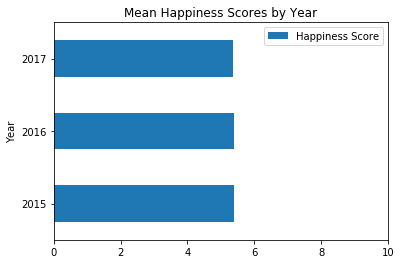

In [41]:
pivot_table_combined.plot(kind='barh', title='Mean Happiness Scores by Year', xlim=(0,10))

In [42]:
# syntax for df.pivot_table
# df.piviot_table('col with values', 'index to group by', aggfunc default is mean)

In [43]:
df.pivot_table?

# Transforming Data

In [44]:
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }

In [45]:
# only applied this mapping to 2015 so the columns don't match down below
df_2015.rename(columns=mapping, inplace=True)

In [46]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


## using df.apply and df.map

In [47]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
    
economy_impact_map = df_2015['Economy'].map(label)

economy_impact_apply = df_2015['Economy'].apply(label)

equal = economy_impact_map.equals(economy_impact_apply)

In [48]:
equal

True

## using df.applymap to apply a function to multiple columns at once

In [49]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']

df_impact = df_2015[factors].applymap(label)

In [50]:
df_impact.head()

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low


In [51]:
df_impact.apply(pd.value_counts)

,Economy,Family,Health,Freedom,Trust,Generosity
High,66,89,2,NaN,NaN,NaN
Low,92,69,156,158.0,158.0,158.0


In [52]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

melt = pd.melt(df_2015, id_vars=main_cols, value_vars=factors)

In [53]:
melt.head()

,Country,Region,Happiness Rank,Happiness Score,variable,value
0,Switzerland,Western Europe,1,7.587,Economy,1.39651
1,Iceland,Western Europe,2,7.561,Economy,1.30232
2,Denmark,Western Europe,3,7.527,Economy,1.32548
3,Norway,Western Europe,4,7.522,Economy,1.45900
4,Canada,North America,5,7.427,Economy,1.32629


In [54]:
melt.shape

(1106, 6)

In [55]:
melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2)

In [56]:
melt.head()

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61
3,Norway,Western Europe,4,7.522,Economy,1.45900,19.40
4,Canada,North America,5,7.427,Economy,1.32629,17.86


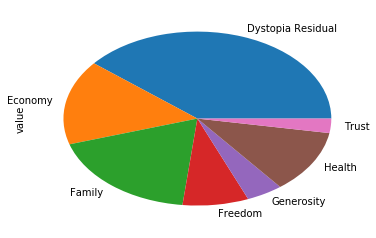

In [57]:
pv_melt = melt.pivot_table(index='variable', values='value')

pv_melt.plot(kind='pie', y='value', legend=False)

# Working with Strings in Pandas

In [58]:
df.rename?

In [59]:
# reading in new data and renaming a long column
world_dev = pd.read_csv("World_dev.csv")
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}
merged = pd.merge(df_2015, world_dev, how='left', left_on='Country', right_on='ShortName')
mreged = merged.rename(columns=col_renaming)


In [60]:
merged.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0


In [61]:
# creatinga  function to apply element wise using the pd.apply

def extract_last_word(element):
    element1 = str(element)
    listwords = element1.split()
    return listwords[-1]

merged['Currency Apply'] = merged['CurrencyUnit'].apply(extract_last_word)

merged['Currency Apply'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Apply, dtype: object

# Pandas vectorized methods


### Method	Description
- Series.str.split()	
    Splits each element in the Series.
- Series.str.strip()	
    Strips whitespace from each string in the Series.
- Series.str.lower()	
    Converts strings in the Series to lowercase.
- Series.str.upper()	
    Converts strings in the Series to uppercase.
- Series.str.get()	
    Retrieves the ith element of each element in the Series.
- Series.str.replace()	
    Replaces a regex or string in the Series with another string.
- Series.str.cat()	
    Concatenates strings in a Series.
- Series.str.extract()	
    Extracts substrings from the Series matching a regex pattern
    
      The str attribute indicates that each object in the Series should be treated as a string, without us having to explicitly change the type to a string like we did when using the apply method.

In [62]:
# getting the last element using vectorized str method

merged['Currency Vectorized'] = merged['CurrencyUnit'].str.split().str.get(-1)

merged.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,...,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0,franc,franc
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0,krona,krona
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0,krone,krone
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0,krone,krone
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar


In [63]:
# handling null/nan values
# if you write a custom column and treat the null as a string it may count it and return an incorrect value;
# the pandas str.len() method accounts for this and correclty counts values with nulls

lengths = merged['CurrencyUnit'].str.len()
value_counts = lengths.value_counts(dropna=False)

In [64]:
value_counts

 14.0    21
 4.0     20
 12.0    17
 13.0    14
NaN      13
 15.0    13
 16.0    12
 18.0     9
 17.0     9
 11.0     8
 22.0     7
 25.0     5
 19.0     3
 9.0      2
 10.0     1
 39.0     1
 26.0     1
 23.0     1
 20.0     1
Name: CurrencyUnit, dtype: int64

# data cleaning
# searching for strings, text, patterns (regex)

In [65]:
# using str.contains() method to do regex search

pattern = r"[Nn]ational accounts"

national_accounts = merged['SpecialNotes'].str.contains(pattern)

national_accounts.head()

0     NaN
1     NaN
2     NaN
3     NaN
4    True
Name: SpecialNotes, dtype: object

In [66]:
national_accounts.value_counts(dropna=False)

NaN      65
True     54
False    39
Name: SpecialNotes, dtype: int64

In [67]:
# when doing a search that may produce nulls it is important to set the na parameter in str.contains() to false; 
# otherwise you will not be able to index a df

national_accounts = merged['SpecialNotes'].str.contains(pattern, na=False)
merged_national_accounts = merged[national_accounts]
merged_national_accounts.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,...,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,...,2011,NaN,"Income survey (IS), 2005",Yes,2010,2010.0,2013.0,2007.0,krona,krona
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,...,2013,NaN,NaN,Yes,2012,2010.0,2013.0,2002.0,dollar,dollar
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,...,2011,NaN,"Expenditure survey/budget survey (ES/BS), 2003",Yes,2011,2011.0,2013.0,2000.0,dollar,dollar
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,...,2010,NaN,"Labor force survey (LFS), 2010",Yes,2012,2008.0,2013.0,2005.0,dollar,dollar


In [68]:
merged_national_accounts.shape

(54, 46)

With regular expressions, we use the following syntax to indicate a character could be a range of numbers:

pattern = r"[0-9]"
And we use the following syntax to indicate a character could be a range of letters:

#lowercase letters
pattern1 = r"[a-z]"
​
#uppercase letters
pattern2 = r"[A-Z]"
We could also make these ranges more restrictive. For example, if we wanted to find a three character substring in a column that starts with a number between 1 and 6 and ends with two letters of any kind, we could use the following syntax:

pattern = r"[1-6][a-z][a-z]"
If we have a pattern that repeats, we can also use curly brackets { and } to indicate the number of times it repeats:

pattern = r"[1-6][a-z][a-z]" = r"[1-6][a-z]{2}"

When we used the Series.str.extract() method, we enclosed our regular expression in parentheses. The parentheses indicate that only the character pattern matched should be extracted and returned in a series. We call this a capturing group.

In [69]:
pattern =r"([1-2][0-9][0-9][0-9])"

# same as above using repeat methods: pattern = r"([1-2][0-9]{3})"

years = merged['SpecialNotes'].str.extract(pattern)
# years[:10]
# this returns a series; to return a dataframe set the 'expand' parameter within extract to True

In [70]:
# naming a regex column; useful when you are trying to use the output as a series for counts

pattern = r"(?P<Years>[1-2][0-9]{3})"

years = merged['SpecialNotes'].str.extractall(pattern)

value_counts = years['Years'].value_counts()

#print(value_counts)

In [71]:
# more thorogh regex to extract years in a YYYY/YY format ie 2019/20
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"



In [72]:
years[:2]

Years
  match      
5 0      1999
  1      1999

In [73]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"

years = merged['SpecialNotes'].str.extractall(pattern)

first_two_year = years['First_Year'].str[0:2]

years['Second_Year'] = first_two_year + years['Second_Year']

In [74]:
years[:5]

First_Year Second_Year
  match                       
5 0           1999         NaN
  1           1999         NaN
6 0           1999         NaN
  1           2037         NaN
  2           1999         NaN

## Method	Description
### Series.str.split()	Splits each element in the Series.
### Series.str.strip()	Strips whitespace from each string in the Series.
### Series.str.lower()	Converts strings in the Series to lowercase.
### Series.str.upper()	Converts strings in the Series to uppercase.
### Series.str.get()	Retrieves the ith element of each element in the Series.
### Series.str.replace()	Replaces a regex or string in the Series with another string.
### Series.str.cat()	Concatenates strings in a Series.
### Series.str.extract()	Extracts substrings from the Series matching a regex pattern.

In [75]:
merged['IncomeGroup'][:2]

0    High income: OECD
1    High income: OECD
Name: IncomeGroup, dtype: object

In [76]:
merged['Inc2'] = merged['IncomeGroup'].str.upper()
merged['Inc2'] = merged['Inc2'].str.strip()
merged['Inc2'] = merged['Inc2'].str.replace(':','')
merged['Inc2'] = merged['Inc2'].str.replace('INCOME','')

In [77]:
merged['Inc2'][:20]

0        HIGH  OECD
1        HIGH  OECD
2        HIGH  OECD
3        HIGH  OECD
4        HIGH  OECD
5        HIGH  OECD
6        HIGH  OECD
7        HIGH  OECD
8        HIGH  OECD
9        HIGH  OECD
10       HIGH  OECD
11    UPPER MIDDLE 
12       HIGH  OECD
13    UPPER MIDDLE 
14       HIGH  OECD
15    UPPER MIDDLE 
16       HIGH  OECD
17       HIGH  OECD
18       HIGH  OECD
19    HIGH  NONOECD
Name: Inc2, dtype: object

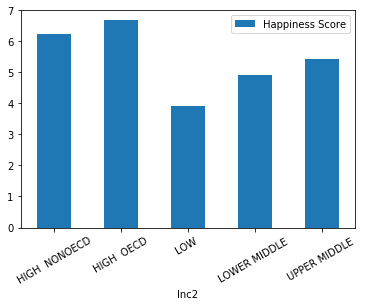

In [78]:
pv_incomes = merged.pivot_table(values='Happiness Score', index='Inc2')
pv_incomes.plot(kind='bar', rot=30)

In [79]:
#str.strip?

# Working with Missing or Duplicate Data

In [80]:
combined = pd.concat([df_2015, df_2016, df_2017], ignore_index=True, sort=False)

In [81]:
combined.shape

(470, 25)

In [82]:
combined.isnull().sum()

Country                            0
Region                           155
Happiness Rank                   155
Happiness Score                    0
Standard Error                   312
Economy                          312
Family                             0
Health                           312
Freedom                            0
Trust                            312
Generosity                         0
Dystopia Residual                155
Year                               0
Lower Confidence Interval        313
Upper Confidence Interval        313
Economy (GDP per Capita)         313
Health (Life Expectancy)         313
Trust (Government Corruption)    313
Happiness.Rank                   315
Whisker.high                     315
Whisker.low                      315
Economy..GDP.per.Capita.         315
Health..Life.Expectancy.         315
Trust..Government.Corruption.    315
Dystopia.Residual                315
dtype: int64

In [83]:
# let's clean the column names before we merge the dataframes
df_2015.columns = df_2015.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()

df_2016.columns = df_2016.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.replace('[()]', '').str.strip().str.upper()

df_2017.columns = df_2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.replace('[()]', '').str.strip().str.upper()

In [84]:
combined = pd.concat([df_2015, df_2016, df_2017], sort=False)

In [85]:
combined.shape

(470, 20)

In [86]:
combined.isnull().sum()

COUNTRY                          0
REGION                         155
HAPPINESS RANK                   0
HAPPINESS SCORE                  0
STANDARD ERROR                 312
ECONOMY                        312
FAMILY                           0
HEALTH                         312
FREEDOM                          0
TRUST                          312
GENEROSITY                       0
DYSTOPIA RESIDUAL                0
YEAR                             0
LOWER CONFIDENCE INTERVAL      313
UPPER CONFIDENCE INTERVAL      313
ECONOMY GDP PER CAPITA         158
HEALTH LIFE EXPECTANCY         158
TRUST GOVERNMENT CORRUPTION    158
WHISKER HIGH                   315
WHISKER LOW                    315
dtype: int64

In [87]:
combined_updated = combined.set_index('YEAR')

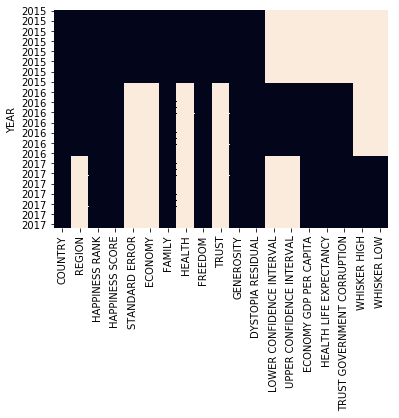

In [88]:
# using a seaborn heatmap to visualize the number of nulls
sns.heatmap(combined_updated.isnull(), cbar=False)

In [89]:
# checking region values for 2017
regions_2017 = combined[combined['YEAR'] == 2017]['REGION']

missing = regions_2017.isnull().sum()

In [90]:
regions_2017[:2]

0    NaN
1    NaN
Name: REGION, dtype: object

In [91]:
df_2017.head()

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,WHISKER HIGH,WHISKER LOW,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,GENEROSITY,TRUST GOVERNMENT CORRUPTION,DYSTOPIA RESIDUAL,YEAR
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [92]:
regions = df_2015[['COUNTRY','REGION']]

In [93]:
regions = regions.append(df_2016[['COUNTRY','REGION']])

In [94]:
regions.shape

(315, 2)

In [95]:
regions = regions.drop_duplicates()

In [96]:
regions.shape

(164, 2)

In [97]:
combined = pd.merge(combined, regions, on='COUNTRY', how='left')

In [98]:
combined.head(2)

,COUNTRY,REGION_x,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY,FAMILY,HEALTH,FREEDOM,TRUST,...,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,ECONOMY GDP PER CAPITA,HEALTH LIFE EXPECTANCY,TRUST GOVERNMENT CORRUPTION,WHISKER HIGH,WHISKER LOW,REGION_y
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,2.51738,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Europe
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,2.70201,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Europe


In [99]:
combined = combined.drop('REGION_x', axis=1)

In [100]:
combined.head(1)

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY,FAMILY,HEALTH,FREEDOM,TRUST,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,ECONOMY GDP PER CAPITA,HEALTH LIFE EXPECTANCY,TRUST GOVERNMENT CORRUPTION,WHISKER HIGH,WHISKER LOW,REGION_y
0,Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Europe


In [101]:
combined.rename(columns={'REGION_y':'REGION'}, inplace=True)

In [102]:
combined.head(1)

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY,FAMILY,HEALTH,FREEDOM,TRUST,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,ECONOMY GDP PER CAPITA,HEALTH LIFE EXPECTANCY,TRUST GOVERNMENT CORRUPTION,WHISKER HIGH,WHISKER LOW,REGION
0,Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Europe


In [103]:
combined.duplicated(['COUNTRY','YEAR']).sum()

0

In [105]:
combined['COUNTRY'] = combined['COUNTRY'].str.upper()
dups = combined.duplicated(['COUNTRY','YEAR'])
combined[dups]

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY,FAMILY,HEALTH,FREEDOM,TRUST,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,ECONOMY GDP PER CAPITA,HEALTH LIFE EXPECTANCY,TRUST GOVERNMENT CORRUPTION,WHISKER HIGH,WHISKER LOW,REGION


In [106]:
# use df.drop_duplicates to get rid of duplicates; by default it keeps the first value, use the 'keep' parameter to set which record to keep

combined = combined.drop_duplicates(['COUNTRY','YEAR'])

In [108]:
combined.isnull().sum()

COUNTRY                          0
HAPPINESS RANK                   0
HAPPINESS SCORE                  0
STANDARD ERROR                 312
ECONOMY                        312
FAMILY                           0
HEALTH                         312
FREEDOM                          0
TRUST                          312
GENEROSITY                       0
DYSTOPIA RESIDUAL                0
YEAR                             0
LOWER CONFIDENCE INTERVAL      313
UPPER CONFIDENCE INTERVAL      313
ECONOMY GDP PER CAPITA         158
HEALTH LIFE EXPECTANCY         158
TRUST GOVERNMENT CORRUPTION    158
WHISKER HIGH                   315
WHISKER LOW                    315
REGION                           2
dtype: int64

In [110]:
combined.shape

(470, 20)

In [114]:
cols_to_drop = ['STANDARD ERROR', 'LOWER CONFIDENCE INTERVAL', 'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW']

In [115]:
combined = combined.drop(cols_to_drop, axis=1)

In [116]:
combined.isnull().sum()

COUNTRY                          0
HAPPINESS RANK                   0
HAPPINESS SCORE                  0
ECONOMY                        312
FAMILY                           0
HEALTH                         312
FREEDOM                          0
TRUST                          312
GENEROSITY                       0
DYSTOPIA RESIDUAL                0
YEAR                             0
ECONOMY GDP PER CAPITA         158
HEALTH LIFE EXPECTANCY         158
TRUST GOVERNMENT CORRUPTION    158
REGION                           2
dtype: int64

In [118]:
combined.notnull().sum().sort_values()

ECONOMY                        158
HEALTH                         158
TRUST                          158
ECONOMY GDP PER CAPITA         312
HEALTH LIFE EXPECTANCY         312
TRUST GOVERNMENT CORRUPTION    312
REGION                         468
COUNTRY                        470
HAPPINESS RANK                 470
HAPPINESS SCORE                470
FAMILY                         470
FREEDOM                        470
GENEROSITY                     470
DYSTOPIA RESIDUAL              470
YEAR                           470
dtype: int64

## pd.dropna()

- another way of dropping na columns all at once is using pd.dropna() and using the 'thresh' parameter to set a number value as the threshold to drop. If the na count is higher than the thresh, the data will be dropped. This can be done row (axis=0) or column-wise (axis=1)


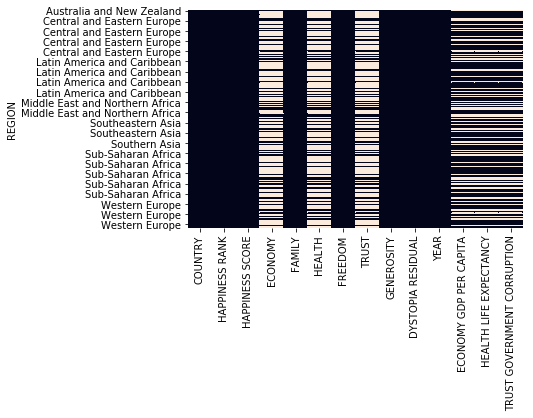

In [119]:
# viewing teh remaining missing values
sorted = combined.set_index('REGION').sort_values(['REGION', 'HAPPINESS SCORE'])
sns.heatmap(sorted.isnull(), cbar=False)

In [120]:
# assigning values to missing values based on mean

happiness_mean = combined['HAPPINESS SCORE'].mean()

print(happiness_mean)

combined['HAPPINESS SCORE UPDATED'] = combined['HAPPINESS SCORE'].fillna(happiness_mean)

print(combined['HAPPINESS SCORE UPDATED'].mean())

5.370727659882891
5.370727659882891
